# Match between Rolex clusters and MC influential nodes and PageRank

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
import numpy as np
from src.load_and_save import * 

In [2]:
# paths 
feature_extractions_path = "data/feature_extractions.csv"
celf_path = 'data/100_spreaders_celf.txt'
pagerank_path = 'data/100_spreaders_pagerank.txt'

## Load nodes from clusters, CELF, and PageRank

In [3]:
# Load cluster nodes
feature_extraction_df = pd.read_csv(feature_extractions_path)
feature_extraction_df.rename(columns={feature_extraction_df.columns[0]: 'node'}, inplace = True)
cluster_df = feature_extraction_df.copy()[['node','cluster']]
cluster_df

,node,cluster
0,2,role_1
1,3,role_1
2,4,role_1
3,5,role_1
4,6,role_3
...,...,...
16494,444546,role_6
16495,446560,role_6
16496,449779,role_6
16497,456041,role_6


In [4]:
# Generated from 02_influential_users: k = 100
celf_top_k_nodes = load_list(celf_path)

In [5]:
# Generated from 02_influential_users: k = 100
pagerank_top_k_nodes = load_list(pagerank_path)

## CELF vs PageRank match

In [6]:
# Calculating overlapping precentage
print("Overlapping percentage between CELF and PageRanke: ", 
      len(set(celf_top_k_nodes) & set(pagerank_top_k_nodes))/len(celf_top_k_nodes)*100,"%")

Overlapping percentage between CELF and PageRanke:  62.0 %


## Cluster sizes

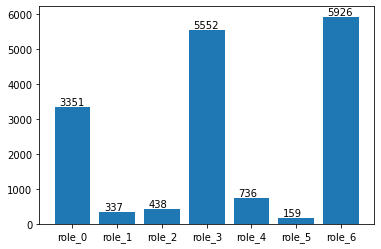

In [7]:
# Counting nodes in each cluster
roles_count = {}
list_roles = list(cluster_df['cluster'])
clusters, counts = np.unique(list_roles, return_counts=True)
for cluster, count in zip(clusters, counts):
    roles_count[cluster] = count

# visualisiong
clusters, counts = zip(*roles_count.items())
plt.bar(clusters, counts)
for i, v in enumerate(counts):
    plt.text(i-0.3, v+50, str(v))
plt.show()

## Calculating the fractions

In [8]:
# Nodes from MC and pagerank
celf_nodes = celf_top_k_nodes.copy()
pagerank_nodes = pagerank_top_k_nodes.copy()

# Nodes Rolex clusters
role_0 = list(cluster_df[cluster_df['cluster'] == 'role_0']['node'])
role_1 = list(cluster_df[cluster_df['cluster'] == 'role_1']['node'])
role_2 = list(cluster_df[cluster_df['cluster'] == 'role_2']['node'])
role_3 = list(cluster_df[cluster_df['cluster'] == 'role_3']['node'])
role_4 = list(cluster_df[cluster_df['cluster'] == 'role_4']['node'])
role_5 = list(cluster_df[cluster_df['cluster'] == 'role_5']['node'])
role_6 = list(cluster_df[cluster_df['cluster'] == 'role_6']['node'])
role_7 = list(cluster_df[cluster_df['cluster'] == 'role_7']['node'])

# List of Rolex clusters 
clusters = [role_0, role_1, role_2, role_3, role_4, role_5, role_6, role_7]

In [9]:
# Dictionary to save clusters fraction of match to MC and PageRank
cluster_match = {}

# Count fraction of nodes same for CELF and PageRank for each cluster 
for i, cluster in enumerate(clusters):
    CELF_fraction_same = len(set(celf_nodes) & set(cluster))/len(celf_nodes)
    PageRank_fraction_same = len(set(pagerank_nodes) & set(cluster))/len(pagerank_nodes)
    cluster_match[i+1] = [1,CELF_fraction_same, PageRank_fraction_same]

In [10]:
cluster_match_df = pd.DataFrame.from_dict(cluster_match)
#cluster_match_df = pd.DataFrame.from_dict(cluster_match, orient = 'index')
cluster_match_df

,1,2,3,4,5,6,7,8
0,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.0
1,0.20,0.12,0.01,0.46,0.0,0.10,0.11,0.0
2,0.12,0.15,0.01,0.54,0.0,0.09,0.09,0.0


## Visualization

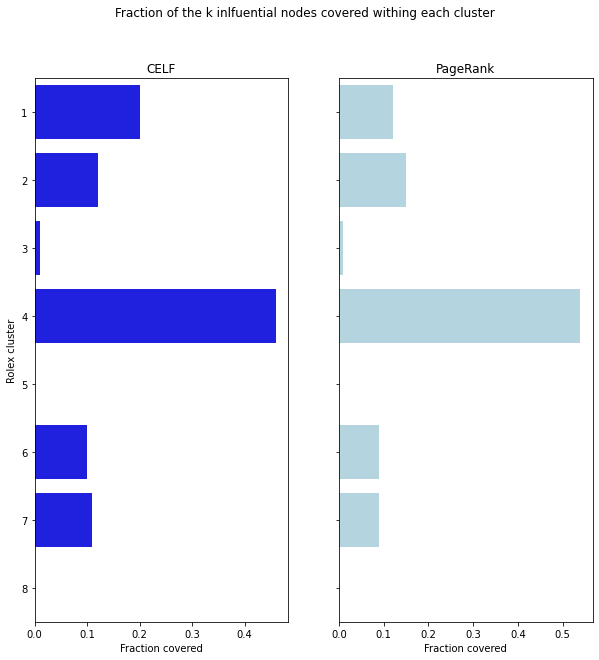

In [11]:
MC = pd.DataFrame(cluster_match_df.iloc[1]).T
PageRank = pd.DataFrame(cluster_match_df.iloc[2]).T

fig, axes = plt.subplots(1, 2, figsize=(10, 10), sharey=True)
fig.suptitle('Fraction of the k inlfuential nodes covered withing each cluster')

# MC 
bar2 = sns.barplot(ax=axes[0], data=MC, color='blue', orient = "h")
axes[0].set_title("CELF")

# PageRank
#bar1 = sns.barplot(ax=axes[1], data=total, color='darkblue')
bar2 = sns.barplot(ax=axes[1], data=PageRank, color='lightblue', orient = "h")
axes[1].set_title("PageRank")


axes[0].set(ylabel='Rolex cluster', xlabel='Fraction covered')
axes[1].set(xlabel='Fraction covered')

# show the graph
plt.show()

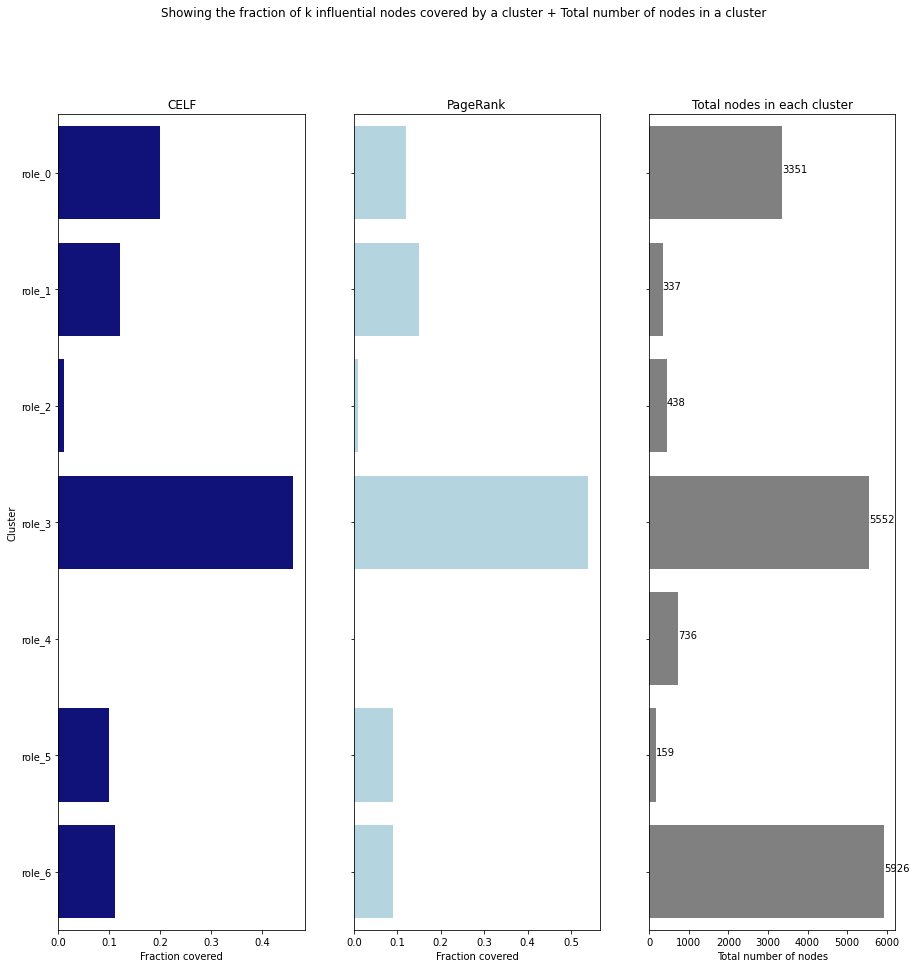

In [12]:
total = pd.DataFrame(cluster_match_df.iloc[0]).T
MC = pd.DataFrame(cluster_match_df.iloc[1]).T
PageRank = pd.DataFrame(cluster_match_df.iloc[2]).T

fig, axes = plt.subplots(1, 3, figsize=(15, 15), sharey=True)
fig.suptitle('Showing the fraction of k influential nodes covered by a cluster + Total number of nodes in a cluster')

# Plotting CELF
bar1 = sns.barplot(ax=axes[0], data=MC, color='darkblue', orient = "h")
axes[0].set_title("CELF")

# Plotting PageRank
bar2 = sns.barplot(ax=axes[1], data=PageRank, color='lightblue', orient = "h")
axes[1].set_title("PageRank")

# Plotting Total nr of nodes

# Counting nodes in each cluster
roles_count = {}
list_roles = list(cluster_df['cluster'])
clusters, counts = np.unique(list_roles, return_counts=True)
for cluster, count in zip(clusters, counts):
    roles_count[cluster] = count

bar3 = sns.barplot(y = clusters, x = counts, ax=axes[2], color='grey', orient = "h")
axes[2].set_title("Total nodes in each cluster")
# Adding total numbers 
for i, v in enumerate(counts):
    plt.text(v, i, str(v))

axes[0].set(ylabel='Cluster', xlabel='Fraction covered')
axes[1].set(xlabel='Fraction covered')
axes[2].set(xlabel='Total number of nodes')

plt.show()

## Only for the intersection...

In [13]:
# get the intersection between CELF and PageRank
common_nodes = list(set(celf_top_k_nodes) & set(pagerank_top_k_nodes))

In [14]:
# Nodes Rolex clusters
role_0 = list(cluster_df[cluster_df['cluster'] == 'role_0']['node'])
role_1 = list(cluster_df[cluster_df['cluster'] == 'role_1']['node'])
role_2 = list(cluster_df[cluster_df['cluster'] == 'role_2']['node'])
role_3 = list(cluster_df[cluster_df['cluster'] == 'role_3']['node'])
role_4 = list(cluster_df[cluster_df['cluster'] == 'role_4']['node'])
role_5 = list(cluster_df[cluster_df['cluster'] == 'role_5']['node'])
role_6 = list(cluster_df[cluster_df['cluster'] == 'role_6']['node'])
role_7 = list(cluster_df[cluster_df['cluster'] == 'role_7']['node'])

# List of Rolex clusters 
clusters = [role_0, role_1, role_2, role_3, role_4, role_5, role_6, role_7]

In [15]:
# Dictionary to save clusters fraction of match to MC and PageRank
cluster_match = {}

# Count fraction of nodes same for CELF and PageRank for each cluster 
for i, cluster in enumerate(clusters):
    common_same = len(set(common_nodes) & set(cluster))/len(common_nodes)
    cluster_match[i] = [common_same]

In [16]:
cluster_match_df = pd.DataFrame.from_dict(cluster_match)
cluster_match_df

,0,1,2,3,4,5,6,7
0,0.16129,0.145161,0.0,0.516129,0.0,0.096774,0.080645,0.0


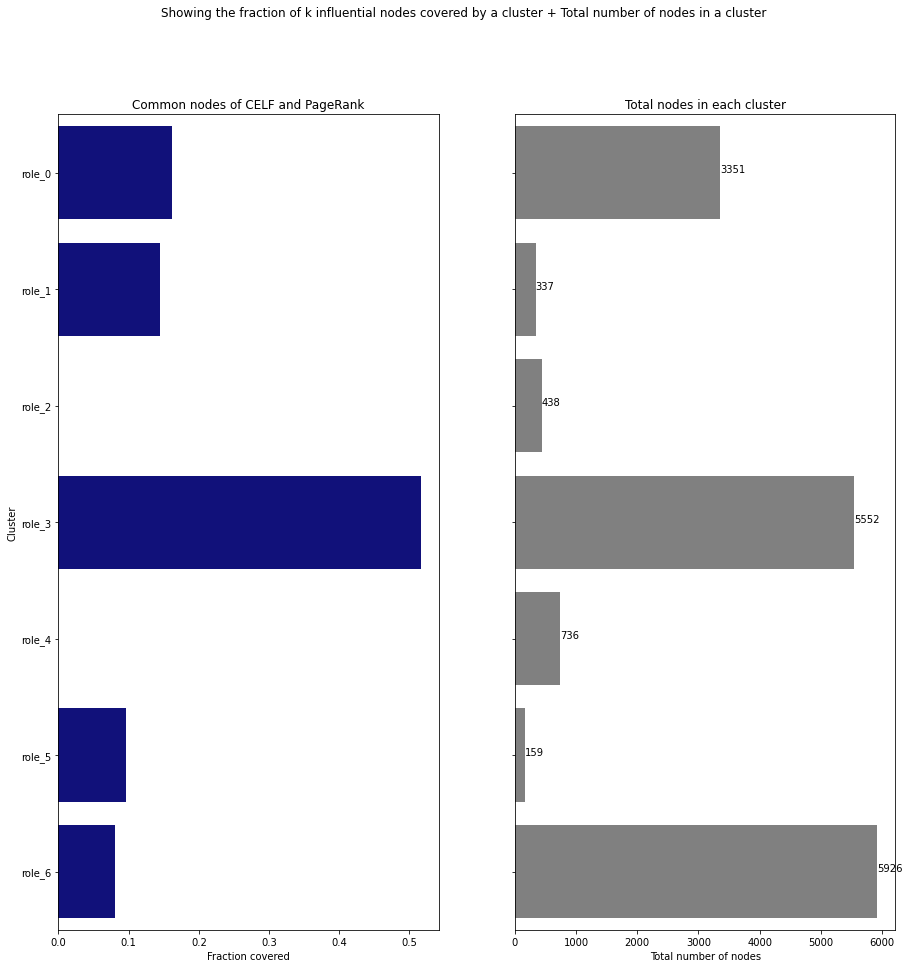

In [17]:
common_nodes = pd.DataFrame(cluster_match_df.iloc[0]).T

fig, axes = plt.subplots(1, 2, figsize=(15, 15), sharey=True)
fig.suptitle('Showing the fraction of k influential nodes covered by a cluster + Total number of nodes in a cluster')

# Plotting common nodes
bar1 = sns.barplot(ax=axes[0], data=common_nodes, color='darkblue', orient = "h")
axes[0].set_title("Common nodes of CELF and PageRank")

# Plotting Total nr of nodes

# Counting nodes in each cluster
roles_count = {}
list_roles = list(cluster_df['cluster'])
clusters, counts = np.unique(list_roles, return_counts=True)
for cluster, count in zip(clusters, counts):
    roles_count[cluster] = count

bar3 = sns.barplot(y = clusters, x = counts, ax=axes[1], color='grey', orient = "h")
axes[1].set_title("Total nodes in each cluster")
# Adding total numbers 
for i, v in enumerate(counts):
    plt.text(v, i, str(v))

axes[0].set(ylabel='Cluster', xlabel='Fraction covered')
axes[1].set(xlabel='Total number of nodes')

plt.show()

# Find common features

## Load RoleX features 

In [38]:
# Load cluster nodes
feature_extraction_df = pd.read_csv(feature_extractions_path)
feature_extraction_df.rename(columns={feature_extraction_df.columns[0]: 'node'}, inplace = True)
feature_extraction_df

,node,external_edges,in_degree,internal_edges,out_degree,total_degree,Betweeness Centrality,k-core,cluster
0,2,3149,654,690,57,711,2.271158e+05,2,role_1
1,3,902,41,124,18,59,1.028602e+05,5,role_1
2,4,11852,1494,5132,255,1749,3.156500e+06,6,role_1
3,5,2914,445,490,42,487,1.841585e+04,14,role_1
4,6,4298,2256,532,53,2309,1.223231e+04,25,role_3
...,...,...,...,...,...,...,...,...,...
16494,444546,80,0,1,1,1,1.274079e+02,22295,role_6
16495,446560,167,0,13,6,6,1.694695e+03,22297,role_6
16496,449779,0,0,1,1,1,1.029845e+01,22343,role_6
16497,456041,94,0,4,2,2,7.775289e+01,414595,role_6


In [39]:
feature_extraction_df.columns

Index(['node', 'external_edges', 'in_degree', 'internal_edges', 'out_degree',
       'total_degree', 'Betweeness Centrality', 'k-core', 'cluster'],
      dtype='object')

In [40]:
# Extracting the most interesting variables 
interesting_var = ['node', 'external_edges', 'in_degree', 'internal_edges', 'out_degree', 'total_degree', 'Betweeness Centrality', 'cluster', 'k-core']

In [41]:
feature_extraction_df = feature_extraction_df[interesting_var]
feature_extraction_df

,node,external_edges,in_degree,internal_edges,out_degree,total_degree,Betweeness Centrality,cluster,k-core
0,2,3149,654,690,57,711,2.271158e+05,role_1,2
1,3,902,41,124,18,59,1.028602e+05,role_1,5
2,4,11852,1494,5132,255,1749,3.156500e+06,role_1,6
3,5,2914,445,490,42,487,1.841585e+04,role_1,14
4,6,4298,2256,532,53,2309,1.223231e+04,role_3,25
...,...,...,...,...,...,...,...,...,...
16494,444546,80,0,1,1,1,1.274079e+02,role_6,22295
16495,446560,167,0,13,6,6,1.694695e+03,role_6,22297
16496,449779,0,0,1,1,1,1.029845e+01,role_6,22343
16497,456041,94,0,4,2,2,7.775289e+01,role_6,414595


## Filtered DF for CELF and PageRank

In [42]:
celf_nodes = celf_top_k_nodes.copy()
pagerank_nodes = pagerank_top_k_nodes.copy()
common_nodes = common_nodes.copy()

In [43]:
# getting all nodes without common nodes
a = set(list(feature_extraction_df['node']))
b = set(common_nodes)
all_excluding_common_nodes = a.difference(b)

In [44]:
celf_features = feature_extraction_df[feature_extraction_df.node.isin(celf_nodes)]

In [45]:
pagerank_features = feature_extraction_df[feature_extraction_df.node.isin(pagerank_nodes)]

In [46]:
common_nodes_features = feature_extraction_df[feature_extraction_df.node.isin(common_nodes)]

In [47]:
all_excluding_common_nodes_features = feature_extraction_df[feature_extraction_df.node.isin(all_excluding_common_nodes)]

In [48]:
# drop node column
feature_extraction_df = feature_extraction_df.drop(['node'], axis=1)
feature_extraction_df

,external_edges,in_degree,internal_edges,out_degree,total_degree,Betweeness Centrality,cluster,k-core
0,3149,654,690,57,711,2.271158e+05,role_1,2
1,902,41,124,18,59,1.028602e+05,role_1,5
2,11852,1494,5132,255,1749,3.156500e+06,role_1,6
3,2914,445,490,42,487,1.841585e+04,role_1,14
4,4298,2256,532,53,2309,1.223231e+04,role_3,25
...,...,...,...,...,...,...,...,...
16494,80,0,1,1,1,1.274079e+02,role_6,22295
16495,167,0,13,6,6,1.694695e+03,role_6,22297
16496,0,0,1,1,1,1.029845e+01,role_6,22343
16497,94,0,4,2,2,7.775289e+01,role_6,414595


## Visualization

In [50]:
features = ['Betweeness Centrality',
 'k-core',
 'total_degree',
 'in_degree',
 'internal_edges',
 'out_degree',
 'external_edges',]

### Boxplot 

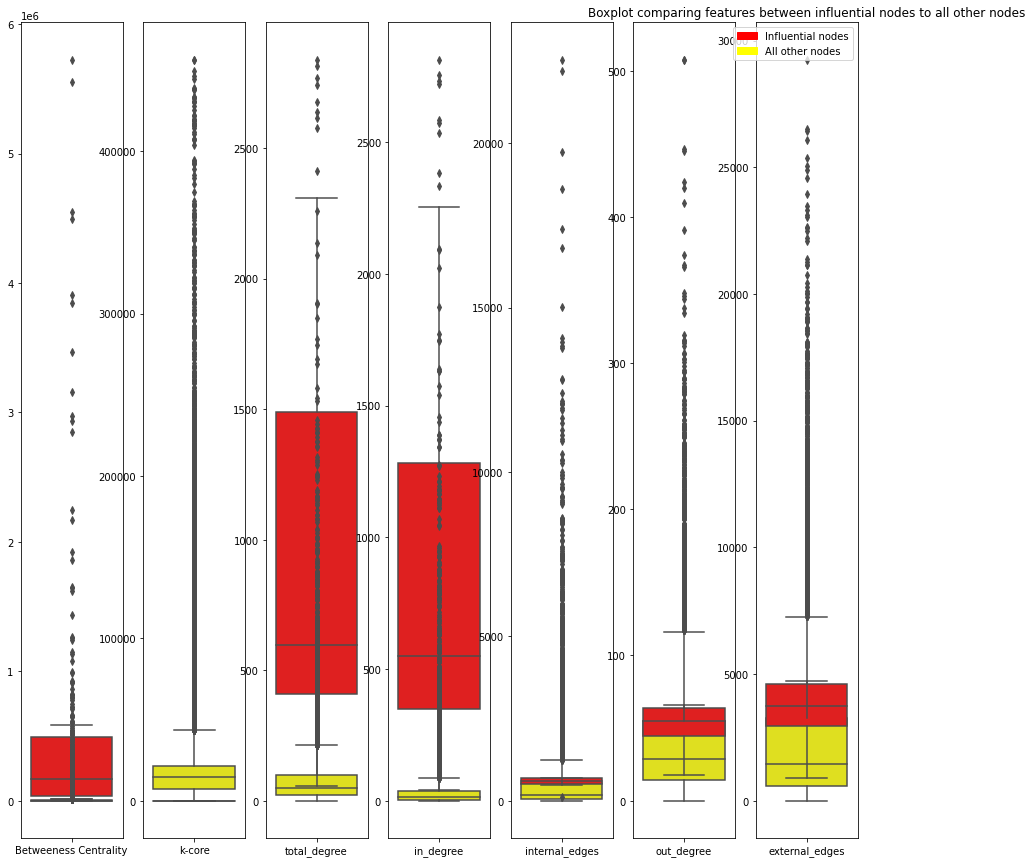

In [57]:
# creating boxplot
fig, ax = plt.subplots(1, 7, figsize=(15, 15))

for var, subplot in zip(features, ax.flatten()):
    sns.boxplot(data=pd.DataFrame(all_excluding_common_nodes_features[var]), ax=subplot, color = "yellow")
    sns.boxplot(data=pd.DataFrame(common_nodes_features[var]),  ax=subplot, color = "red")

plt.title("Boxplot comparing features between influential nodes to all other nodes") 
red_patch = mpatches.Patch(color='red', label='Influential nodes')
yellow_patch = mpatches.Patch(color='yellow', label='All other nodes')
plt.legend(handles=[red_patch, yellow_patch])


plt.show()

### Histogram

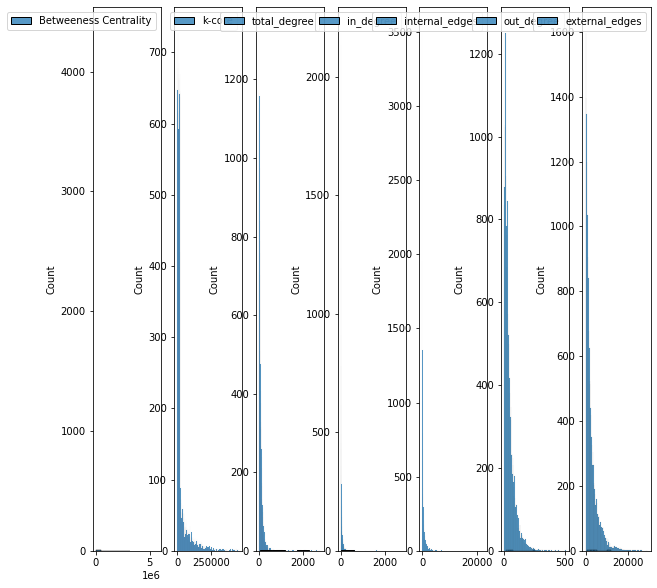

In [58]:
fig, ax = plt.subplots(1, 7, figsize=(10, 10))
for var, subplot in zip(features, ax.flatten()):
    sns.histplot(data=pd.DataFrame(all_excluding_common_nodes_features[var]), ax=subplot)
    sns.histplot(data=pd.DataFrame(common_nodes_features[var]), ax=subplot)

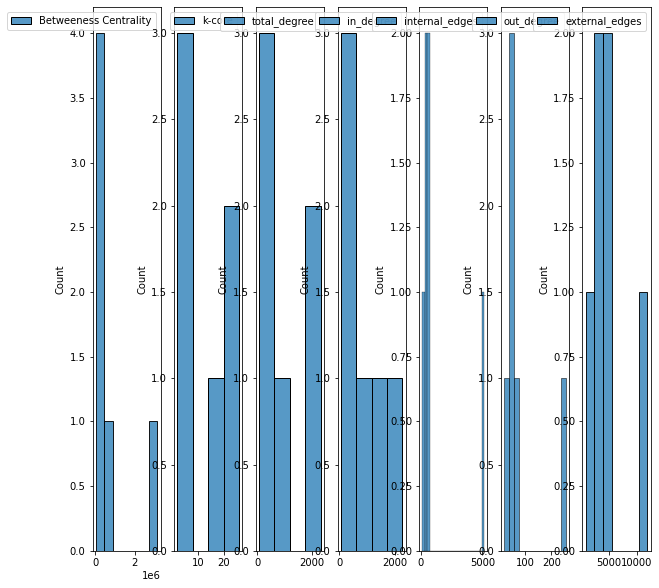

In [59]:
fig, ax = plt.subplots(1, 7, figsize=(10, 10))
for var, subplot in zip(features, ax.flatten()):
    sns.histplot(data=pd.DataFrame(common_nodes_features[var]), ax=subplot)

### Violinplot

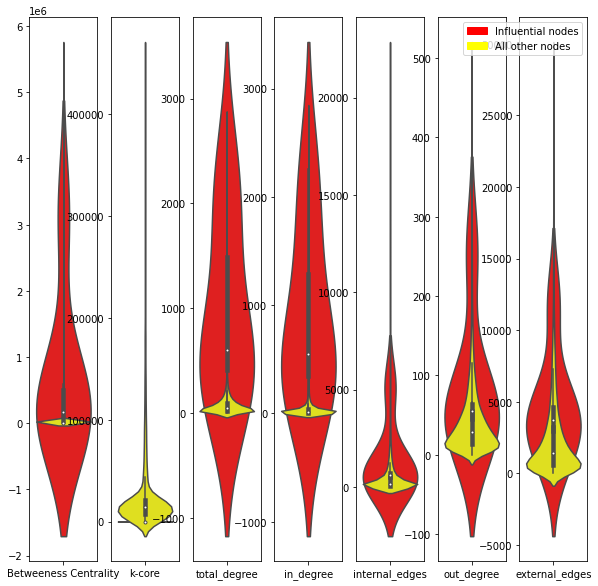

In [60]:
fig, ax = plt.subplots(1, 7, figsize=(10, 10))
for var, subplot in zip(features, ax.flatten()):
    sns.violinplot(data=pd.DataFrame(common_nodes_features[var]),  ax=subplot, color = "red")
    sns.violinplot(data=pd.DataFrame(all_excluding_common_nodes_features[var]), ax=subplot, color = "yellow")
    
red_patch = mpatches.Patch(color='red', label='Influential nodes')
yellow_patch = mpatches.Patch(color='yellow', label='All other nodes')
plt.legend(handles=[red_patch, yellow_patch])

plt.show()

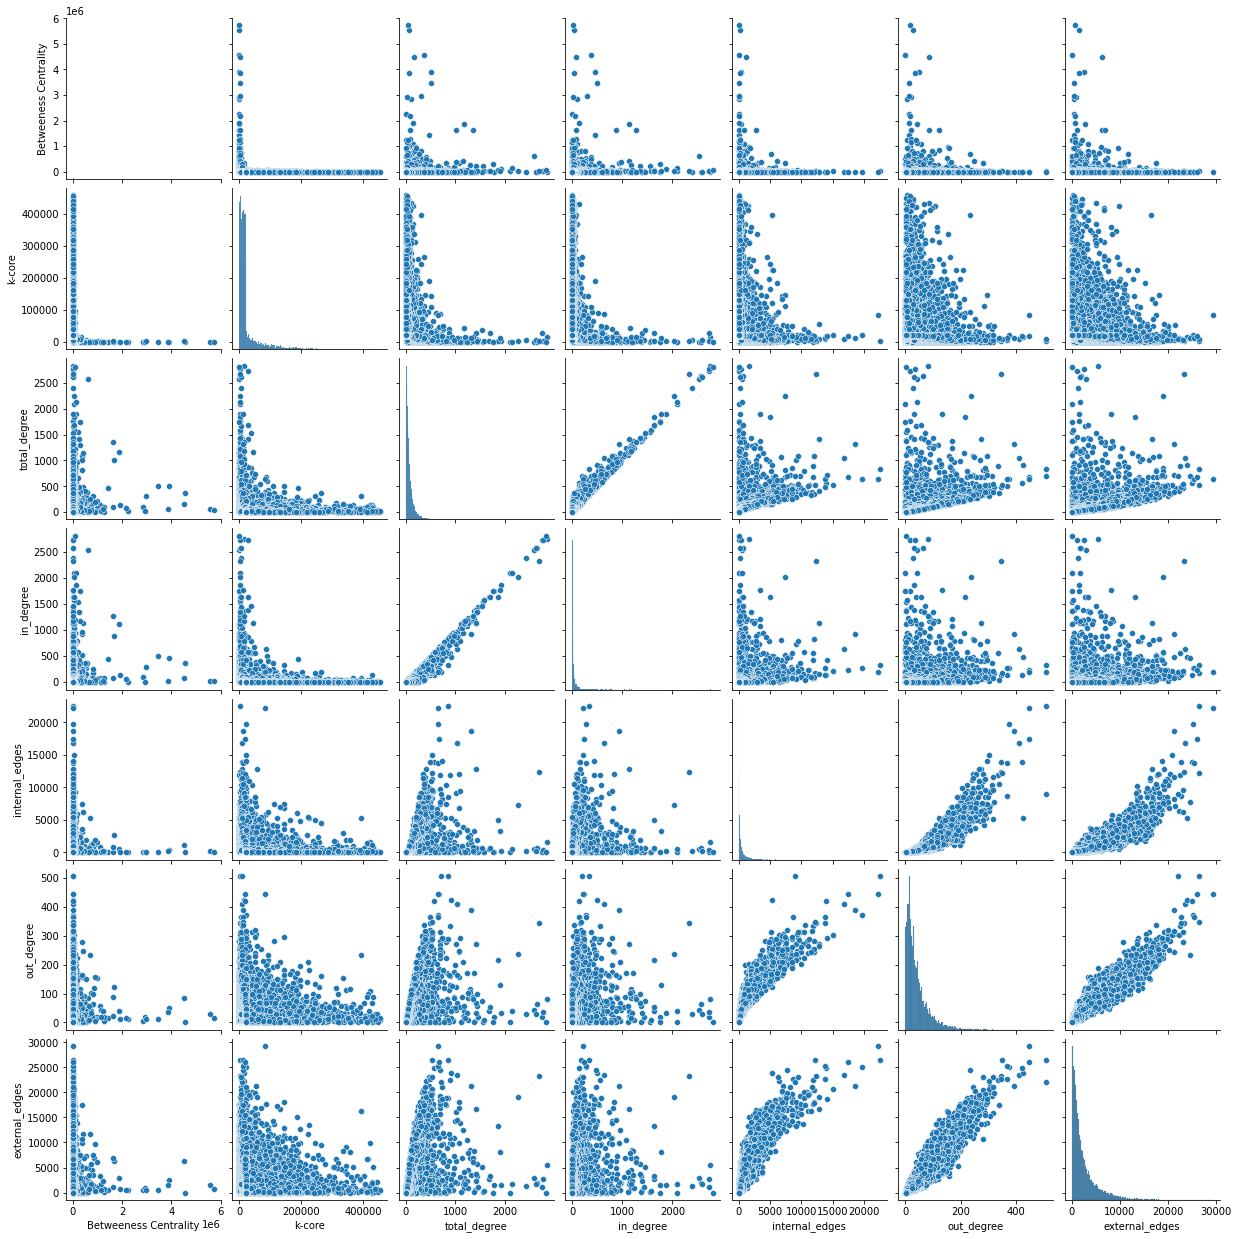

In [61]:
sns.pairplot(all_excluding_common_nodes_features[features])

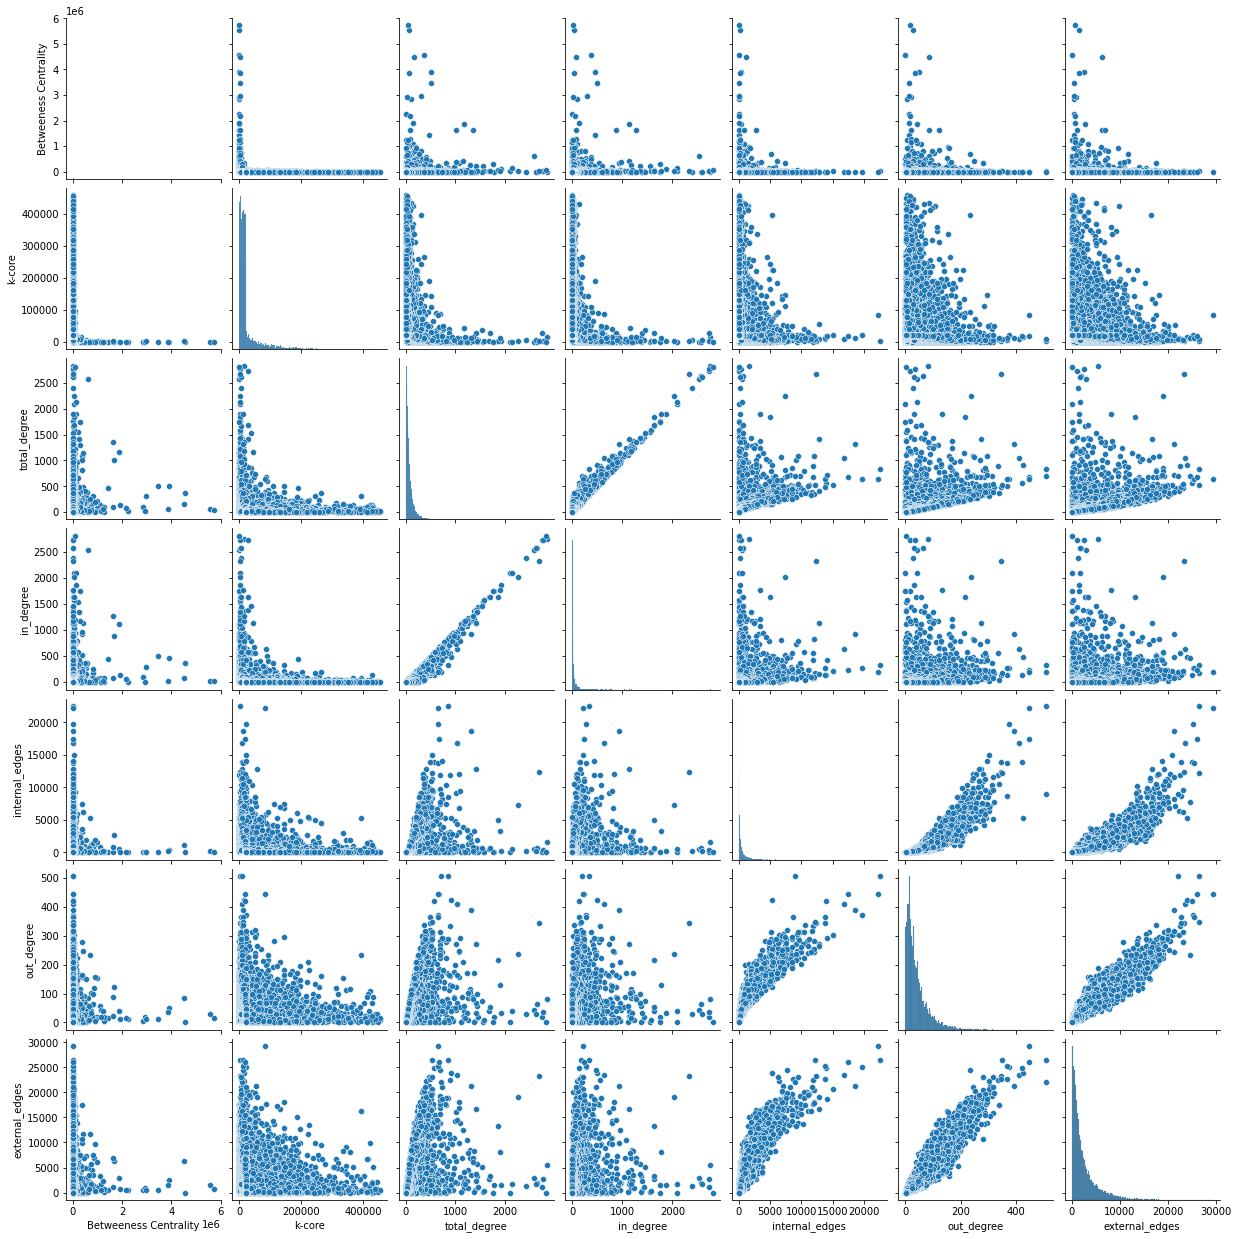

In [62]:
sns.pairplot(all_excluding_common_nodes_features[features])